<a href="https://colab.research.google.com/github/VARITHSA/Prodigy-Infotech/blob/main/prodigy_ml_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [2]:
df1 = df['Spending Score (1-100)']
df1

,Spending Score (1-100)
0,39
1,81
2,6
3,77
4,40
...,...
195,79
196,28
197,74
198,18


In [7]:
from sklearn.cluster import KMeans

ld =[]
for i in range (1,20):
  kmean = KMeans(n_clusters=i,init ='k-means++',random_state=42)
  kmean.fit(df1.values.reshape(-1,1))
  ld.append(kmean.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

[132703.99999999988,
 45855.747342848495,
 13901.380274071393,
 8868.149197258317,
 5144.980746254944,
 3438.6944912523472,
 2578.6901530220357,
 1963.1123661135766,
 1530.5005203130195,
 1248.8632399303585,
 1034.7285987190737,
 871.6624209124205,
 747.2212862159154,
 671.1357256778309,
 540.9487703473003,
 473.25153702506697,
 403.53245132060954,
 343.6854094735675,
 322.0517306523886]

In [8]:
ld


[132703.99999999988,
 45855.747342848495,
 13901.380274071393,
 8868.149197258317,
 5144.980746254944,
 3438.6944912523472,
 2578.6901530220357,
 1963.1123661135766,
 1530.5005203130195,
 1248.8632399303585,
 1034.7285987190737,
 871.6624209124205,
 747.2212862159154,
 671.1357256778309,
 540.9487703473003,
 473.25153702506697,
 403.53245132060954,
 343.6854094735675,
 322.0517306523886]

Text(0, 0.5, 'Inertia')

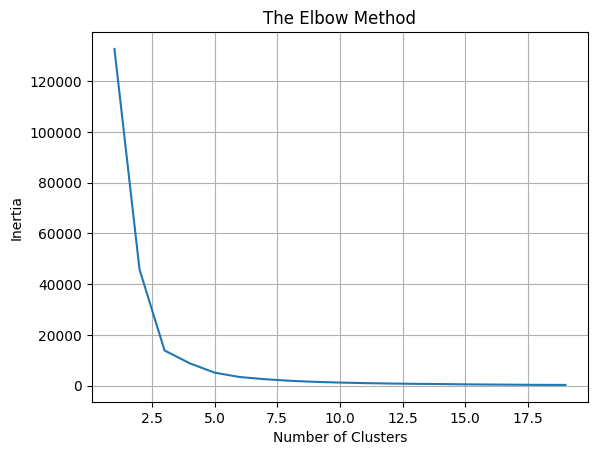

In [11]:
import matplotlib.pyplot as plt
plt.plot(range(1,20),ld)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.grid()
plt.ylabel('Inertia')

3

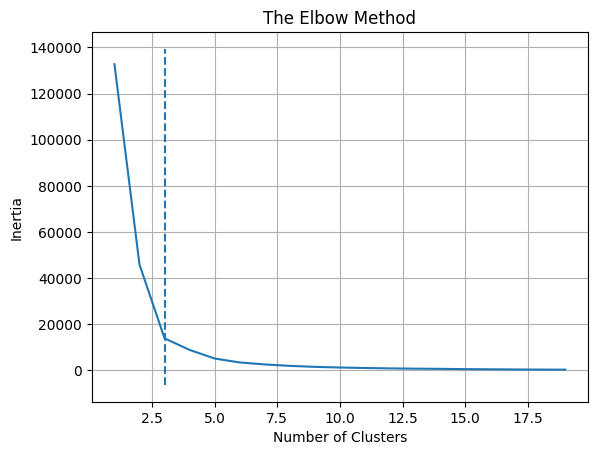

In [17]:
import kneed
kneedle = kneed.KneeLocator(range(1,20), ld, curve="convex", direction="decreasing")
plt.plot(range(1,20),ld)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.grid()
plt.ylabel('Inertia')
plt.vlines(kneedle.elbow, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
kneedle.elbow


In [21]:
Kmean = KMeans(n_clusters=3,init ='k-means++',random_state=42)
y_kmeans =Kmean.fit(df1.values.reshape(-1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [22]:
df['Cluster'] = Kmean.labels_
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,0
2,3,Female,20,16,6,2
3,4,Female,23,16,77,0
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,2
197,198,Male,32,126,74,0
198,199,Male,32,137,18,2


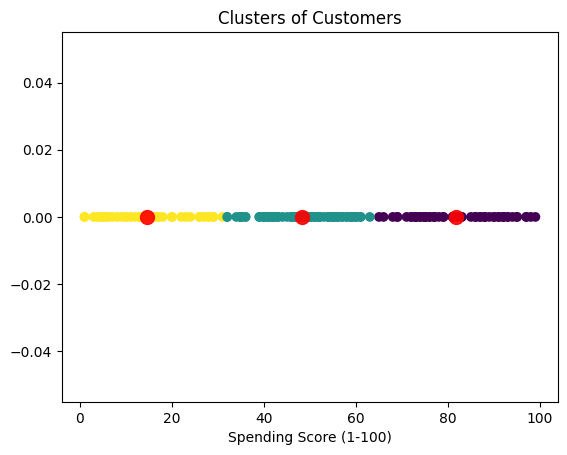

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans # Make sure to import KMeans

# Assuming df1 and Kmean are defined as in your previous cells

plt.scatter(df1,np.zeros_like(df1), c=Kmean.labels_, cmap='viridis') # Use Kmean.labels_ for colors
centers = Kmean.cluster_centers_
plt.scatter(centers,np.zeros_like(centers),c='red',s=100,alpha=0.9)
plt.title('Clusters of Customers')
plt.xlabel('Spending Score (1-100)')
plt.show()